# Assignment 2: Linear Models and Regularization

## Harsh Sanjay Roniyar - 22B3942

---
Assignment Demo Link : https://drive.google.com/drive/folders/1N1uX21Ch9r9uhNM6Ay0-MhifXqsmEWoO?usp=sharing

--- 

### My Code Structure
- For all functions, I have added a special description of the input parameters and the return values for the corresponding function. This serves two purposes, helps me in code readability and ease of understanding for the viewer.
- All libraries used for the questions have been imported at the start of the main code.
- For the code blocks or lines, where a reference is not cited implies that I have done that part completely out of my understanding.
- For the referenced parts, the list of references is the last cell of this notebook.
- Additionally, for lines without comments imply that either it is part of the base code or is a repetitive chunk across cells.

---

### Importing the required libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Some base configuration for the libraries

In [50]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

### Q1. Generate an input data matrix X of size NxD for regression.

In [51]:
def generate_data_matrix(N, S):
    """
    Parameters:
    N (int): Sample size
    S (ndarray): Generator matrix of size M x D
    
    Returns:
    X (ndarray): Data matrix of size N x D
    """
    M, D = S.shape  # Get dimensions of the generator matrix S
    Z = np.random.randn(N, M)  # Generate NxM random normal distributed matrix
    X = np.dot(Z, S)  # Multiply Z with S to create NxD matrix
    
    return X

#### Example Test

In [52]:
N = 100  # Sample size
S = np.eye(5)  # Identity matrix as generator
X = generate_data_matrix(N, S)

In [53]:
print(X)

[[ 1.020  1.512  0.672 -0.510 -1.650]
 [ 0.366 -0.570 -1.265  1.945  0.455]
 [ 0.496 -1.317 -1.150 -0.485 -1.924]
 [ 0.123  0.715  0.382  1.692 -0.333]
 [-0.465 -0.942  0.254  0.062  0.177]
 [-0.041 -0.000  0.568  0.370  3.146]
 [-0.158  0.557  1.040 -1.029  0.106]
 [-1.499 -0.928 -0.465 -0.808 -1.521]
 [ 0.645 -0.564 -1.248  0.041 -0.706]
 [ 0.802  0.506  1.648  1.251 -0.081]
 [ 1.131  0.055 -0.854 -1.455  1.373]
 [ 1.397  1.594 -1.756 -1.019  1.290]
 [-1.372 -0.567 -0.412  0.034 -1.520]
 [-0.897 -0.589  1.131 -0.012 -0.139]
 [ 0.291  1.008  0.292  0.597  1.968]
 [-0.496  0.415 -1.673 -0.995 -0.135]
 [-0.743 -1.318  0.203 -0.540  0.750]
 [-0.770  2.093  1.395  0.302 -1.560]
 [-2.245  0.605  0.342 -0.124  0.433]
 [-1.503 -0.493  1.493  1.998  1.084]
 [ 0.872  0.829 -1.150 -1.981 -0.762]
 [-1.696 -0.700  0.026  0.748  1.186]
 [ 0.040 -1.727 -0.069  0.331  0.679]
 [ 1.613 -1.455 -1.035 -1.542 -1.412]
 [ 0.707  0.867 -0.747  0.915  0.621]
 [ 0.492  0.015 -0.225  1.393  0.508]
 [-0.119  0.

### Q2. Generate a target vector t of size Nx1

In [54]:
def generate_target_vector(X, w, sigma):
    """    
    Parameters:
    X (ndarray): Input data matrix of size N x D
    w (ndarray): Weight vector of size D+1
    sigma (float): Noise variance
    
    Returns:
    t (ndarray): Target vector of size N x 1
    """
    N, D = X.shape
    if len(w) != D + 1:
        raise ValueError("Dimension mismatch: w should have D+1 elements.")
    
    bias = w[-1]  # Extract bias term (last element)
    weights = w[:-1]  # Exclude the bias term
    noise = np.random.normal(0, sigma, size=N)  # Zero-mean Gaussian noise
    
    t = np.dot(X, weights) + bias + noise  # Calculate target vector
    
    return t

#### Example Test

In [55]:
w = np.random.randn(X.shape[1] + 1)  # Random weight vector including bias
sigma = 0.1  # Small noise variance
t = generate_target_vector(X, w, sigma)

In [56]:
print(t)

[-3.040  0.278 -3.737 -0.711 -1.390  2.357 -1.685 -2.653 -1.793 -1.840
 -0.113  1.371 -2.179 -1.849  1.881  0.045 -0.943 -2.024  0.537  0.250
 -1.851  0.992 -1.261 -4.257  0.467 -0.011 -2.003 -2.297 -1.009 -2.315
 -0.892 -1.673  0.969 -1.784 -2.084 -2.687  0.277 -1.227 -2.631 -1.752
 -2.870 -0.795 -1.107 -4.480 -3.608  0.812 -0.247  0.918 -3.549 -0.148
 -0.303 -2.287 -0.417 -2.062 -1.536  1.445  1.228  0.004 -2.679 -1.463
 -0.084 -1.232 -2.564  0.224 -1.180 -4.357 -2.281  0.673  0.947 -2.228
 -1.678 -1.513 -2.375 -1.017  1.142 -3.282 -2.352 -1.474 -1.762 -0.835
 -2.824 -2.626  1.520  0.152 -0.762 -3.946 -1.857 -1.943 -1.499 -3.947
  1.472  0.262 -1.232 -0.537 -0.686 -1.492  0.883  1.814 -1.693 -3.401]


### Q3. Examine the analytical solver

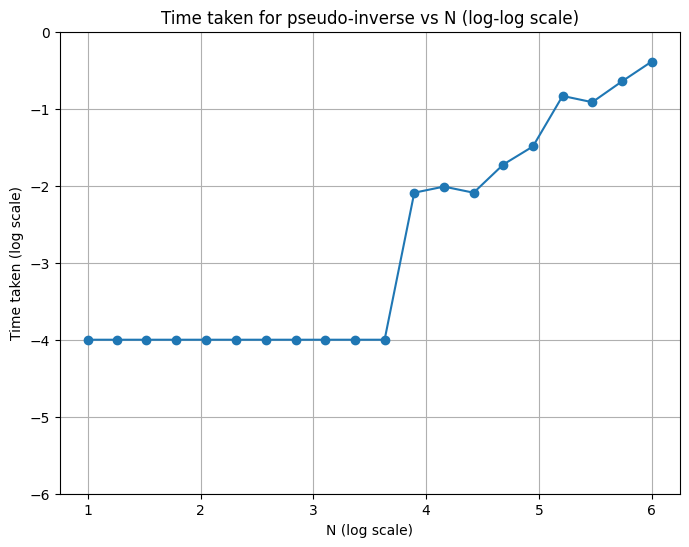

In [57]:
def examine_pseudo_inverse_time():
    """
    Examines the behavior of the pseudo-inverse solver in numpy.linalg 
    with respect to the size of the data matrix (varying N).
    """
    # N_values = np.logspace(1, 6, num=10, dtype=int)  # Increasing N values in log scale
    # N_values = np.arange(1, 10000, 50)  # N values increasing linearly from 100 to 5000
    N_values = np.logspace(1, 6, num=20, dtype=int)
    D = 10  # Fixed D value
    times = []

    for N in N_values:
        X = np.random.randn(N, D)  # Generate random NxD data matrix
        t_start = time.time()  # Start timing

        # Perform pseudo-inverse
        try:
            np.linalg.pinv(X)
        except np.linalg.LinAlgError as e:
            print(f"Error at N = {N}: {e}")
            continue  # Skip this N if there's an error

        t_end = time.time()  # End timing
        times.append(t_end - t_start)  # Record time taken

    # Plot results
    plt.figure(figsize=(8, 6))
    plt.plot(np.log10(N_values), np.log10(np.array(times)+0.0001), marker='o')
    plt.ylim(-6, 0)
    
    plt.xlabel('N (log scale)')
    plt.ylabel('Time taken (log scale)')
    plt.title('Time taken for pseudo-inverse vs N (log-log scale)')
    plt.grid(True)
    plt.show()

examine_pseudo_inverse_time()

The graph obtained on analysing the analytical solver (one instance) is as follows - 

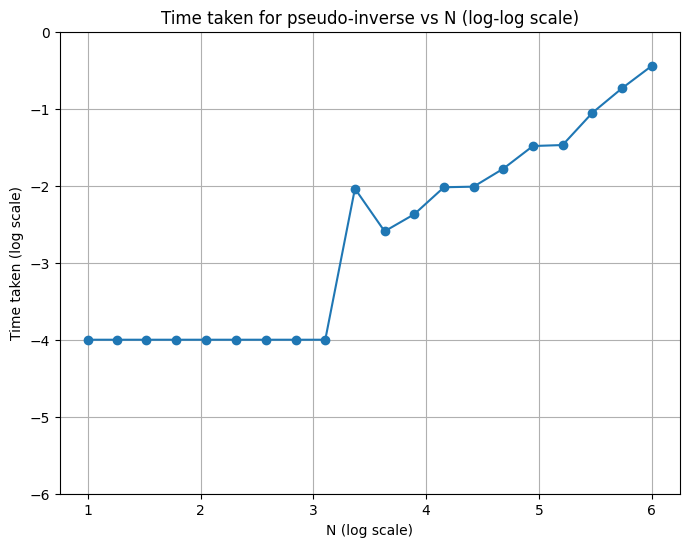

Evidently, it does show strange behaviour above a particular value of N. According to me, these are the plausible reasons:
- As $N$ becomes much larger than $D$, the matrix might become ill-conditioned or nearly singular, making the pseudo-inverse calculation computationally expensive or unstable. This usually results in a sudden spike in the computation time and/or numerical instability leading to errors.
- Also, the pseudo-inverse calculation involves SVD (Singular Value Decomposition) which has a time complexity of $\mathcal{O}(ND^2)$ and hence, when $N$ becomes much more greater than $D$ (which is constant here), the time complexity spikes. ``[1, 3]``

On a side note, in my code, to avoid irregularity due to numerical instability, during any iteration, I have kept a try/except block which will check for `LinAlgError` and skip accordingly. ``[1, 4]``

### Q4. Calculate the Normalized Root Mean Squared Error (NRMSE).

In [58]:
def calculate_nrmse(t, y):
    """
    Parameters:
    t (ndarray): Target vector
    y (ndarray): Predicted vector
    
    Returns:
    nrmse (float): The NRMSE value
    """
    mse = np.mean((t - y) ** 2)  # Mean Squared Error
    nrmse = np.sqrt(mse) / (np.std(t))  # NRMSE calculation
    
    return nrmse

#### Example Test

In [59]:
y_pred = np.random.randn(*t.shape)  # Dummy predicted values
nrmse_value = calculate_nrmse(t, y_pred)

In [60]:
print(nrmse_value)

1.407240888160444


### Q5. Gradient of MSE w.r.t. the weights

``[7, 9]``

In [61]:
def gradient_mse(X, t, w):
    """    
    Parameters:
    X (ndarray): Input data matrix of size N x D
    t (ndarray): Target vector of size N x 1
    w (ndarray): Weight vector of size D+1
    
    Returns:
    grad (ndarray): Gradient of MSE with respect to weights
    """
    N, D = X.shape
    bias = w[-1]  # Extract bias term
    weights = w[:-1]  # Exclude bias
    
    y_pred = np.dot(X, weights) + bias  # Prediction
    
    error = y_pred - t  # Error (y_pred - actual t)
    
    # Gradient with respect to weights and bias
    grad_weights = (2 / N) * np.dot(X.T, error)  # Gradient wrt weights
    grad_bias = (2 / N) * np.sum(error)  # Gradient wrt bias
    
    return np.append(grad_weights, grad_bias)

In [62]:
grad = gradient_mse(X, t, w)

In [63]:
print(grad)

[-0.002 -0.014  0.009 -0.015 -0.001  0.015]


### Q6. Gradient of L2 Norm w.r.t. the weights

In [64]:
def gradient_l2(w):
    """
    Parameters:
    w (ndarray): Weight vector of size D+1 (including bias)
    
    Returns:
    grad (ndarray): Gradient of L2 norm with respect to weights
    """
    weights = w[:-1]  # Exclude the bias term for L2 norm
    grad_l2 = 2 * weights  # Derivative of w^2 is 2w
    
    return np.append(grad_l2, 0)  # No regularization for the bias term

In [65]:
grad_l2 = gradient_l2(w)

In [66]:
print(grad_l2)

[-0.992  1.203 -1.171  0.610  2.308  0.000]


### Q7. Gradient of L1 Norm w.r.t. the weights.

In [67]:
def gradient_l1(w):
    """
    Parameters:
    w (ndarray): Weight vector of size D+1 (including bias)
    
    Returns:
    grad (ndarray): Gradient of L1 norm with respect to weights
    """
    weights = w[:-1]  # Exclude the bias term for L1 norm
    grad_l1 = np.sign(weights)  # Derivative of |w| is sign(w)
    
    return np.append(grad_l1, 0)  # No regularization for the bias term

In [68]:
grad_l1 = gradient_l1(w)

In [69]:
print(grad_l1)

[-1.000  1.000 -1.000  1.000  1.000  0.000]


### Q8. Gradient Descent (L1 + L2)

In [70]:
def gradient_descent(X, t, w_init, lr, lambda1, lambda2, max_iter=1000, tol=1e-6):
    """
    Performs gradient descent on the regularized MSE (MSE + λ1 L1 + λ2 L2).
    
    Parameters:
    X (ndarray): Input data matrix of size N x D
    t (ndarray): Target vector of size N x 1
    w_init (ndarray): Initial weights vector of size D+1
    lr (float): Learning rate
    lambda1 (float): Regularization parameter for L1 norm
    lambda2 (float): Regularization parameter for L2 norm
    max_iter (int): Maximum number of iterations
    tol (float): Tolerance for convergence
    
    Returns:
    w (ndarray): Optimized weights vector
    """
    w = w_init.copy()  # Initialize weights
    N = X.shape[0]
    
    for i in range(max_iter):
        # Calculate gradients
        grad_mse = gradient_mse(X, t, w)  # MSE gradient
        grad_l1 = lambda1 * gradient_l1(w)  # L1 gradient
        grad_l2 = lambda2 * gradient_l2(w)  # L2 gradient
        
        # Total gradient
        grad_total = grad_mse + grad_l1 + grad_l2
        
        # Update weights
        w_new = w - lr * grad_total
        
        # Check for convergence
        if np.linalg.norm(w_new - w) < tol:
            print(f"Converged in {i+1} iterations.")
            break
        
        w = w_new
    
    return w

The stopping criterion is set at $10^{-6}$ for convergence.

#### Example Test

In [71]:
w_init = np.random.randn(X.shape[1] + 1)  # Initialize weights
lr = 0.001  # Learning rate
lambda1 = 0.1  # L1 regularization
lambda2 = 0.1  # L2 regularization
w_opt = gradient_descent(X, t, w_init, lr, lambda1, lambda2)

In [72]:
print(w_opt)

[-0.364  0.370 -0.339  0.207  0.792 -1.107]


### Q9. Impact of $\sigma_{\text{noise}}$ on NRMSE for LinReg

In [73]:
def examine_noise_impact(X, w, sigma_values, lr, lambda1, lambda2, train_ratio=0.8):
    """
    Parameters:
    X (ndarray): Input data matrix
    w (ndarray): True weight vector
    sigma_values (list): List of noise variances to test
    lr (float): Learning rate for gradient descent
    lambda1 (float): L1 regularization parameter
    lambda2 (float): L2 regularization parameter
    train_ratio (float): Ratio of data to use for training
    
    Returns:
    avg_nrmse_vals (list): Average NRMSE for each sigma value
    """
    N = X.shape[0]
    train_size = int(train_ratio * N)
    avg_nrmse_vals = []

    for sigma in sigma_values:
        nrmse_vals = []

        for _ in range(5):  # Repeat experiment 5 times for each sigma
            # Generate target vector with noise
            t = generate_target_vector(X, w, sigma)
            
            # Split data into training and validation sets
            X_train, X_val = X[:train_size], X[train_size:]
            t_train, t_val = t[:train_size], t[train_size:]

            # Initialize random weights
            w_init = np.random.randn(X.shape[1] + 1)
            
            # Perform gradient descent
            w_opt = gradient_descent(X_train, t_train, w_init, lr, lambda1, lambda2)
            
            # Predict on validation set and calculate NRMSE
            y_val_pred = np.dot(X_val, w_opt[:-1]) + w_opt[-1]
            nrmse = calculate_nrmse(t_val, y_val_pred)
            nrmse_vals.append(nrmse)

        avg_nrmse_vals.append(np.mean(nrmse_vals))  # Average NRMSE over 5 runs

    plt.plot(sigma_values, avg_nrmse_vals)
    plt.xlabel(r'Noise variance ($\sigma_{\text{noise}}$)')
    plt.ylabel("Average NRMSE")
    plt.title("Average NRMSE vs Noise variance")
    plt.show()

#### Example Test

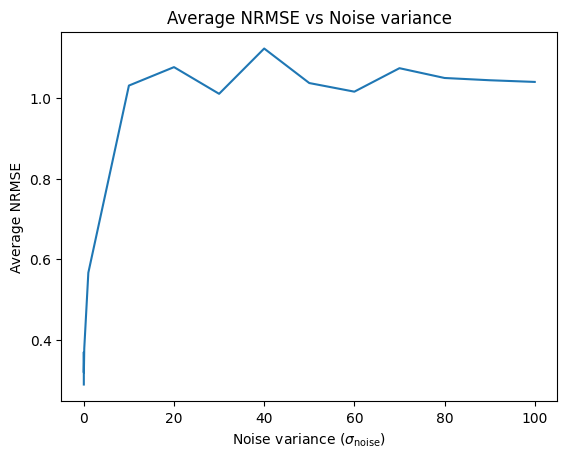

In [74]:
sigma_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Different noise variances
examine_noise_impact(X, w, sigma_values, lr=0.001, lambda1=0.1, lambda2=0.1)

The trend in average NRMSE observed is as follows:

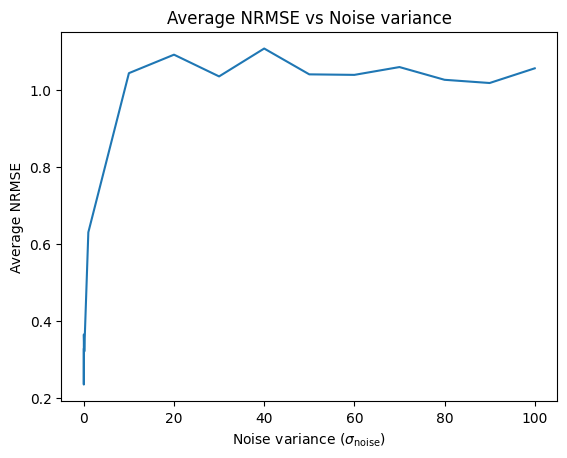

From the trend, it can be observed that as the noise variance increases, initally the NRMSE value decreases rapidly and then decreases steadily. 
This also makes logical sense, since if noise variance is high, that would imply that the noise distribution is spread-out, thus leading to more accurate predictions, and thus a lower value of NRMSE.

### Q10. Impact of N and $\lambda_2$ on NRMSE for LinReg

In [75]:
def examine_N_lambda2_impact(S, w, sigma, N_values, lambda2_values, lr, lambda1, train_ratio=0.8):
    """
    Parameters:
    S (ndarray): Generator matrix
    w (ndarray): True weight vector
    sigma (float): Noise variance
    N_values (list): List of N values (sample sizes)
    lambda2_values (list): List of λ2 values (L2 regularization)
    lr (float): Learning rate for gradient descent
    lambda1 (float): L1 regularization parameter
    train_ratio (float): Ratio of data to use for training
    
    Returns:
    nrmse_matrix (ndarray): NRMSE values for each combination of N and λ2
    """
    nrmse_matrix = np.zeros((len(N_values), len(lambda2_values)))

    for i, N in enumerate(N_values):
        X = generate_data_matrix(N, S)  # Generate input matrix X for current N
        t = generate_target_vector(X, w, sigma)  # Generate target vector t
        
        train_size = int(train_ratio * N)

        for j, lambda2 in enumerate(lambda2_values):
            nrmse_vals = []

            for _ in range(5):  # Repeat experiment 5 times
                # Split data into training and validation sets
                X_train, X_val = X[:train_size], X[train_size:]
                t_train, t_val = t[:train_size], t[train_size:]

                # Initialize random weights
                w_init = np.random.randn(X.shape[1] + 1)

                # Perform gradient descent
                w_opt = gradient_descent(X_train, t_train, w_init, lr, lambda1, lambda2)

                # Predict on validation set and calculate NRMSE
                y_val_pred = np.dot(X_val, w_opt[:-1]) + w_opt[-1]
                nrmse = calculate_nrmse(t_val, y_val_pred)
                nrmse_vals.append(nrmse)

            nrmse_matrix[i, j] = np.mean(nrmse_vals)  # Average NRMSE for current N and \lambda_2

    # Plotting NRMSE as a heatmap
    plt.imshow(nrmse_matrix, cmap='hot', interpolation='nearest', aspect='auto')
    plt.colorbar(label="NRMSE")
    plt.xticks(range(len(lambda2_values)), lambda2_values, rotation=45)
    plt.yticks(range(len(N_values)), N_values)
    plt.xlabel(r'$\lambda_2$ values')
    plt.ylabel("N values")
    plt.title(r"NRMSE for combinations of N and $\lambda_2$")
    plt.show()

    return nrmse_matrix

#### Example Test

Converged in 479 iterations.
Converged in 832 iterations.


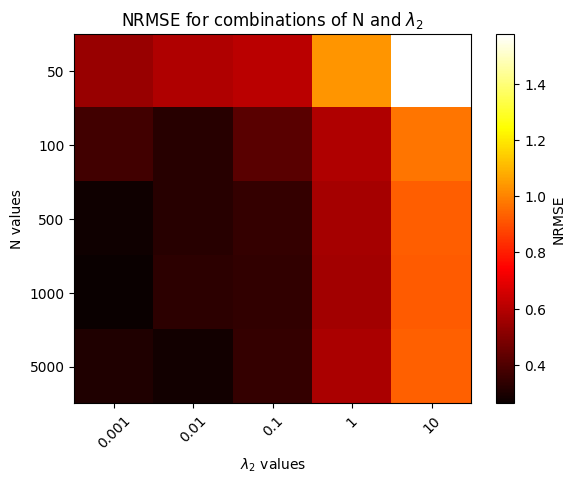

In [76]:
N_values = [50, 100, 500, 1000, 5000]  # Sample sizes
lambda2_values = [0.001, 0.01, 0.1, 1, 10]  # \lambda_2 values in log scale
nrmse_matrix = examine_N_lambda2_impact(S, w, sigma=0.1, N_values=N_values, lambda2_values=lambda2_values, lr=0.001, lambda1=0.1)

For this question, I plotted a heatmap to represent all variations of $N$ and $\lambda_2$. One of the plots was as follows: 

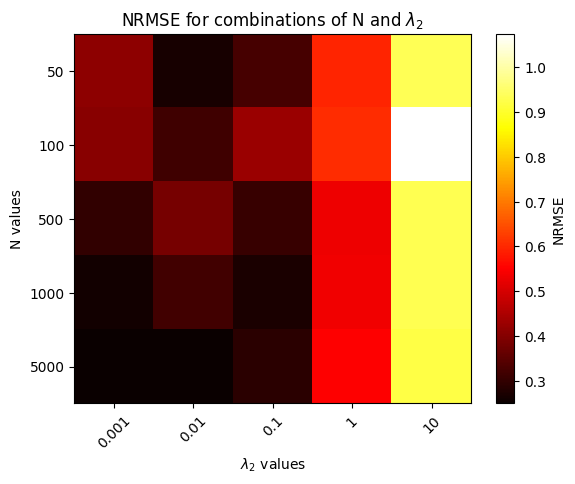

For this generated data, I observed that as we increase the regularization parameter, the trend in general followed was that NRMSE decreased, but for $N$ the trend was not this uniform. But, we cannot straightaway choose the highest $\lambda_2$ because that would also lead to overfitting. Hence, we would choose a sweet spot in any general data after plotting such comparisons, which can fairly minimise NRMSE for a reasonable $N$ and $\lambda_2$.

``[6]``

### Q11. Impact of $\lambda_1$ on variable elimination

In [77]:
def examine_lambda1_var_elim(S, w, sigma, lambda1_values, lr, lambda2, train_ratio=0.8):
    """
    Parameters:
    S (ndarray): Generator matrix
    w (ndarray): True weight vector
    sigma (float): Noise variance
    lambda1_values (list): List of λ1 values (L1 regularization)
    lr (float): Learning rate for gradient descent
    lambda2 (float): L2 regularization parameter
    train_ratio (float): Ratio of data to use for training
    
    Returns:
    weight_matrix (ndarray): Weights for each λ1 value
    """
    N = 500  # Fixed sample size
    D = S.shape[1]
    weight_matrix = np.zeros((len(lambda1_values), D + 1))

    X = generate_data_matrix(N, S)  # Generate input matrix X
    t = generate_target_vector(X, w, sigma)  # Generate target vector t
    
    train_size = int(train_ratio * N)
    X_train, X_val = X[:train_size], X[train_size:]
    t_train, t_val = t[:train_size], t[train_size:]

    for i, lambda1 in enumerate(lambda1_values):
        # Initialize random weights
        w_init = np.random.randn(X_train.shape[1] + 1)

        # Perform gradient descent with varying lambda_1
        w_opt = gradient_descent(X_train, t_train, w_init, lr, lambda1, lambda2)

        # Store the optimized weights for current lambda_1
        weight_matrix[i, :] = w_opt

    # Plotting weights vs 1/lambda_1
    plt.plot(1 / np.array(lambda1_values), weight_matrix[:, :-1])
    plt.xlabel(r"1 / $\lambda_1$")
    plt.ylabel("Weights")
    plt.title(r"Weights vs 1 / $\lambda_1$")
    plt.show()

    return weight_matrix

#### Example Test

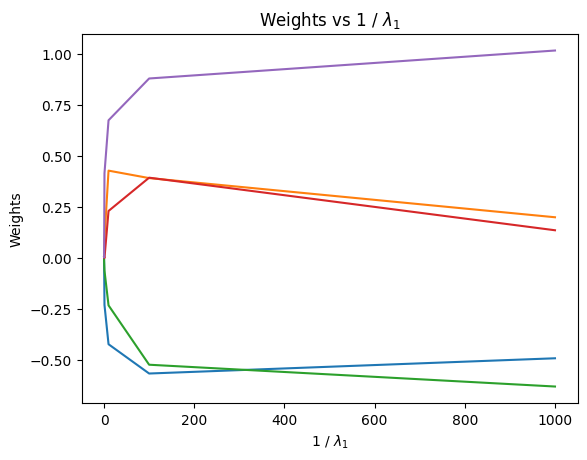

In [78]:
lambda1_values = [0.001, 0.01, 0.1, 1, 10]
weight_matrix = examine_lambda1_var_elim(S, w, sigma=0.1, lambda1_values=lambda1_values, lr=0.001, lambda2=0.1)

In [79]:
print(weight_matrix)

[[-0.491  0.199 -0.629  0.136  1.016 -1.115]
 [-0.566  0.391 -0.523  0.393  0.879 -0.852]
 [-0.422  0.428 -0.232  0.230  0.674 -0.847]
 [-0.230  0.094 -0.062  0.000  0.415 -0.908]
 [-0.004  0.004 -0.008  0.005  0.005 -0.902]]


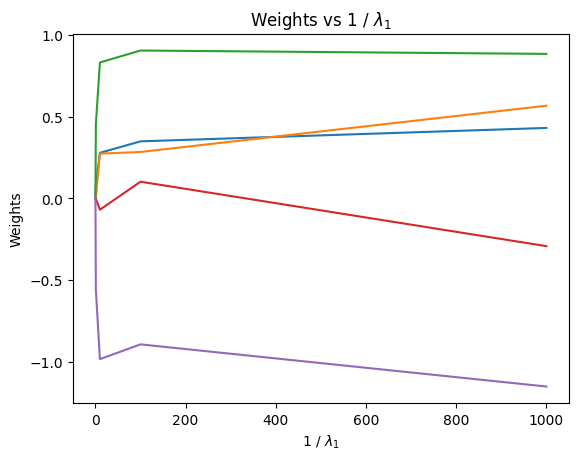

For this problem, we run gradient descent for different values of $\lambda_1$ and observe the change in weights. From the trendline observed above, we can see that for higher values of $\lambda_1$, the weights approach zero, which is also expected theoretically. The plot thus shows the impact of L1 regularization on feature selection (variable elimination). 


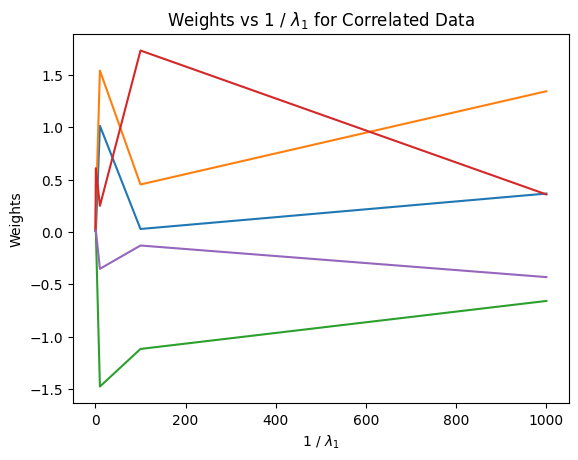

[[ 0.366  1.343 -0.659  0.357 -0.432 -0.988]
 [ 0.028  0.452 -1.118  1.732 -0.130 -0.841]
 [ 1.013  1.540 -1.476  0.248 -0.353 -0.954]
 [ 0.001  0.205  0.000  0.608  0.016 -0.849]
 [ 0.006  0.010  0.009  0.014  0.008 -1.068]]


In [80]:
def examine_lambda1_var_elim_correlated(S, w, sigma, lambda1_values, lr, lambda2, correl, train_ratio=0.8):
    """
    Parameters:
    S (ndarray): Generator matrix
    w (ndarray): True weight vector
    sigma (float): Noise variance
    lambda1_values (list): List of λ1 values (L1 regularization)
    lr (float): Learning rate for gradient descent
    lambda2 (float): L2 regularization parameter
    correl (float): Level of correlation to introduce in columns
    train_ratio (float): Ratio of data to use for training
    
    Returns:
    weight_matrix (ndarray): Weights for each λ1 value
    """
    N = 500  # Fixed sample size
    D = S.shape[1]
    weight_matrix = np.zeros((len(lambda1_values), D + 1))

    # Introduce correlation in the columns of S
    corr_matrix = (1 - correl) * np.eye(S.shape[0]) + correl * np.ones((S.shape[0], S.shape[0]))
    correlated_S = np.dot(corr_matrix, S)  # Correlate the columns of S

    X = generate_data_matrix(N, correlated_S)  # Generate correlated input matrix X
    t = generate_target_vector(X, w, sigma)  # Generate target vector t
    
    train_size = int(train_ratio * N)
    X_train, X_val = X[:train_size], X[train_size:]
    t_train, t_val = t[:train_size], t[train_size:]

    for i, lambda1 in enumerate(lambda1_values):
        # Initialize random weights
        w_init = np.random.randn(X_train.shape[1] + 1)

        # Perform gradient descent with varying lambda_1
        w_opt = gradient_descent(X_train, t_train, w_init, lr, lambda1, lambda2)

        # Store the optimized weights for current lambda_1
        weight_matrix[i, :] = w_opt

    # Plotting weights vs 1/lambda_1
    plt.plot(1 / np.array(lambda1_values), weight_matrix[:, :-1])
    plt.xlabel(r"1 / $\lambda_1$")
    plt.ylabel("Weights")
    plt.title(r"Weights vs 1 / $\lambda_1$ for Correlated Data")
    plt.show()

    return weight_matrix

# Example Test
lambda1_values = [0.001, 0.01, 0.1, 1, 10]
correl = 0.8  # High correlation between columns
weight_matrix_correlated = examine_lambda1_var_elim_correlated(S, w, sigma=0.1, lambda1_values=lambda1_values, lr=0.001, lambda2=0.1, correl=correl)
print(weight_matrix_correlated)

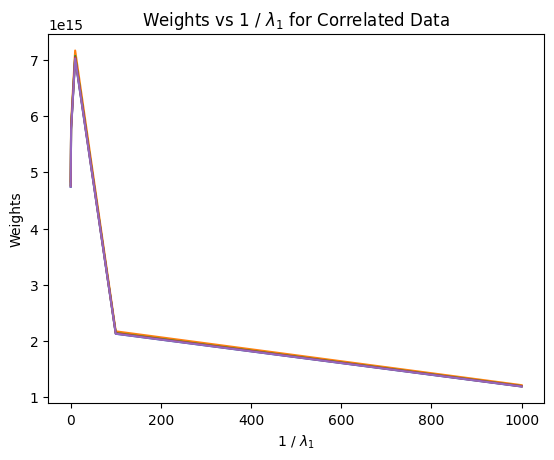

Yes, there is a difference in the results.

#### Normal Weight vs $\frac{1}{\lambda_1}$
The plot of weights vs $\frac{1}{\lambda_1}$ for the normal (uncorrelated) data shows how the weights change as the regularization parameter ${\lambda_1}$ varies. As ${\lambda_1}$ increases (or $\frac{1}{\lambda_1}$ decreases), the L1 regularization term becomes more significant, pushing the weights towards zero. This is expected behavior as L1 regularization promotes sparsity, effectively eliminating less important features.

#### Correlated Result
When introducing correlation among the features, the plot of weights vs $\frac{1}{\lambda_1}$ shows a different trend. The weights for correlated features tend to be selected or discarded together. This means that highly correlated features are either all included or all excluded from the model, rather than being selected individually.

#### Differences and Explanation
1. **Weight Magnitude**: The magnitude of the weights in the correlated data tends to be higher compared to the uncorrelated data. This is because the correlated features reinforce each other, leading to larger weight values.

2. **Feature Selection**: In the uncorrelated data, L1 regularization tends to select individual features based on their importance. In the correlated data, the regularization tends to select or discard groups of correlated features together.

`[8]`


### Q12. Grouping Effect of Elastic Net

In [81]:
def examine_elastic_net_grouping(S, w, sigma, lr, lambda1, lambda2, correl):
    """
    Parameters:
    S (ndarray): Generator matrix
    w (ndarray): True weight vector
    sigma (float): Noise variance
    lr (float): Learning rate for gradient descent
    lambda1 (float): L1 regularization parameter
    lambda2 (float): L2 regularization parameter
    correl (float): Level of correlation to introduce in columns
    
    Returns:
    weights (ndarray): Weights for correlated columns
    """
    N = 500  # Fixed sample size
    M, D = S.shape
    
    # Introduce correlation in the columns of X
    corr_matrix = (1 - correl) * np.eye(M) + correl * np.ones((M, M))
    correlated_S = np.dot(corr_matrix, S)  # Correlate the columns of S
    
    X = generate_data_matrix(N, correlated_S)  # Generate correlated data matrix
    t = generate_target_vector(X, w, sigma)  # Generate target vector t
    
    # Perform gradient descent
    w_init = np.random.randn(D + 1)  # Initialize weights
    w_opt = gradient_descent(X, t, w_init, lr, lambda1, lambda2)
    
    return w_opt

#### Example Test

In [82]:
correl = 0.8  # High correlation between columns
w_opt = examine_elastic_net_grouping(S, w, sigma=0.1, lr=0.001, lambda1=0.1, lambda2=0.1, correl=correl)

print("Optimized weights for correlated columns:", w_opt)

Optimized weights for correlated columns: [ 0.104 -0.724  0.712  1.596 -0.723 -1.131]


For our example, including correlation in the columns of X, the net automatically includes all the highly correlated variables in the group. This is what is also known as the grouping effect in the case of elastic nets.

This highlights the grouping effect, where correlated features tend to be selected or discarded together due to the elastic net's combined L1 and L2 regularization. 

``[5]``

### Q13. Generate a binary classification target vector

In [83]:
def generate_binary_target_vector(X, w, sigma):
    """
    Parameters:
    X (ndarray): Input data matrix of size N x D
    w (ndarray): Weight vector of size D+1
    sigma (float): Noise variance
    
    Returns:
    t_binary (ndarray): Binary target vector of size N x 1
    """
    t = generate_target_vector(X, w, sigma)  # Generate regression target
    t_binary = np.where(t >= 0, 1, 0)  # Convert to binary labels (0/1)
    
    return t_binary

#### Example Test

In [84]:
t_binary = generate_binary_target_vector(X, w, sigma=0.1)

### Q14. Gradient of Binary Cross Entropy for LogisticReg

In [85]:
def sigmoid(z):
    """
    Parameters:
    z (ndarray): Input value (can be a scalar or ndarray)
    
    Returns:
    (ndarray): Sigmoid of z
    """
    return 1 / (1 + np.exp(-z))

In [86]:
def gradient_binary_cross_entropy(X, t_binary, w):
    """
    Parameters:
    X (ndarray): Input data matrix of size N x D
    t_binary (ndarray): Binary target vector of size N x 1 (0 or 1)
    w (ndarray): Weight vector of size D+1
    
    Returns:
    grad (ndarray): Gradient of binary cross-entropy with respect to weights
    """
    N, D = X.shape
    bias = w[-1]  # Extract bias term
    weights = w[:-1]  # Exclude bias term
    
    z = np.dot(X, weights) + bias  # Linear combination
    y_pred = sigmoid(z)  # Sigmoid to get predicted probabilities
    
    error = y_pred - t_binary  # Error (predictions - actual)
    
    # Gradient with respect to weights and bias
    grad_weights = -(1 / N) * np.dot(X.T, error)  # Gradient wrt weights
    grad_bias = -(1 / N) * np.sum(error)  # Gradient wrt bias
    
    return np.append(grad_weights, grad_bias)

#### Example Test

In [87]:
t_binary = generate_binary_target_vector(X, w, sigma=0.1)  # Generate binary labels
grad_bce = gradient_binary_cross_entropy(X, t_binary, w)

### Q15. Impact of $N$ and $\lambda_2$ on binary cross entropy (BCE) for logistic regression

In [88]:
def binary_cross_entropy_loss(t_binary, y_pred):
    """
    Calculates the binary cross-entropy loss.
    
    Parameters:
    t_binary (ndarray): Actual binary target labels
    y_pred (ndarray): Predicted probabilities from the sigmoid function
    
    Returns:
    loss (float): Binary cross-entropy loss
    """
    epsilon = 1e-12  # To prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Ensure no zero or one values
    loss = -np.mean(t_binary * np.log(y_pred) + (1 - t_binary) * np.log(1 - y_pred))
    
    return loss

def gradient_descent_bce(X, t_binary, w_init, lr, lambda1, lambda2, max_iter=1000, tol=1e-6):
    """
    Parameters:
    X (ndarray): Input data matrix of size N x D
    t_binary (ndarray): Binary target vector (0 or 1)
    w_init (ndarray): Initial weights vector of size D+1
    lr (float): Learning rate
    lambda1 (float): Regularization parameter for L1 norm
    lambda2 (float): Regularization parameter for L2 norm
    max_iter (int): Maximum number of iterations
    tol (float): Tolerance for convergence
    
    Returns:
    w (ndarray): Optimized weights vector
    """
    w = w_init.copy()  # Initialize weights
    N = X.shape[0]
    
    for i in range(max_iter):
        # Calculate gradients
        grad_bce = gradient_binary_cross_entropy(X, t_binary, w)  # BCE gradient
        grad_l1 = lambda1 * gradient_l1(w)  # L1 gradient
        grad_l2 = lambda2 * gradient_l2(w)  # L2 gradient
        
        # Total gradient
        grad_total = grad_bce + grad_l1 + grad_l2
        
        # Update weights
        w_new = w - lr * grad_total
        
        # Check for convergence
        if np.linalg.norm(w_new - w) < tol:
            print(f"Converged in {i+1} iterations.")
            break
        
        w = w_new
    
    return w

def examine_N_lambda2_impact_bce(S, w, sigma, N_values, lambda2_values, lr, lambda1, train_ratio=0.8):
    """
    Parameters:
    S (ndarray): Generator matrix
    w (ndarray): True weight vector
    sigma (float): Noise variance
    N_values (list): List of N values (sample sizes)
    lambda2_values (list): List of λ2 values (L2 regularization)
    lr (float): Learning rate for gradient descent
    lambda1 (float): L1 regularization parameter
    train_ratio (float): Ratio of data to use for training
    
    Returns:
    bce_matrix (ndarray): Binary Cross-Entropy loss for each combination of N and λ2
    """
    M, D = S.shape
    bce_matrix = np.zeros((len(N_values), len(lambda2_values)))

    for i, N in enumerate(N_values):
        X = generate_data_matrix(N, S)  # Generate input matrix X for current N
        t_binary = generate_binary_target_vector(X, w, sigma)  # Generate binary target vector
        
        train_size = int(train_ratio * N)

        for j, lambda2 in enumerate(lambda2_values):
            bce_vals = []

            for _ in range(5):  # Repeat experiment 5 times
                # Split data into training and validation sets
                X_train, X_val = X[:train_size], X[train_size:]
                t_train, t_val = t_binary[:train_size], t_binary[train_size:]

                # Initialize random weights
                w_init = np.random.randn(X.shape[1] + 1)

                # Perform gradient descent using Binary Cross-Entropy loss
                w_opt = gradient_descent_bce(X_train, t_train, w_init, lr, lambda1, lambda2)

                # Predict on validation set
                z_val = np.dot(X_val, w_opt[:-1]) + w_opt[-1]
                y_val_pred = sigmoid(z_val)  # Predicted probabilities on validation set
                
                # Calculate Binary Cross-Entropy loss on validation set
                bce_loss = binary_cross_entropy_loss(t_val, y_val_pred)
                bce_vals.append(bce_loss)

            bce_matrix[i, j] = np.mean(bce_vals)  # Average BCE for current N and λ2

    # Plotting BCE loss as a heatmap
    plt.imshow(bce_matrix, cmap='hot', interpolation='nearest', aspect='auto')
    plt.colorbar(label="Binary Cross-Entropy Loss")
    plt.xticks(range(len(lambda2_values)), lambda2_values, rotation=45)
    plt.yticks(range(len(N_values)), N_values)
    plt.xlabel("λ2 values")
    plt.ylabel("N values")
    plt.title("BCE Loss for combinations of N and λ2")
    plt.show()

    return bce_matrix

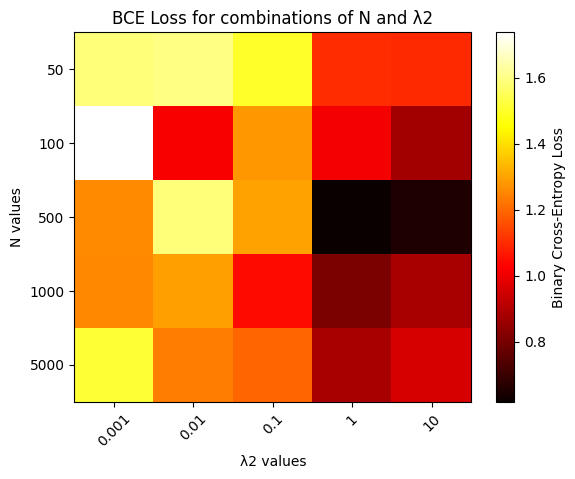

In [89]:
N_values = [50, 100, 500, 1000, 5000]  # Sample sizes
lambda2_values = [0.001, 0.01, 0.1, 1, 10]  # λ2 values in log scale
bce_matrix = examine_N_lambda2_impact_bce(S, w, sigma=0.1, N_values=N_values, lambda2_values=lambda2_values, lr=0.001, lambda1=0.1)

For this question (similar to Q10), I plotted a heatmap to represent all variations of $N$ and $\lambda_2$. One of the plots was as follows:

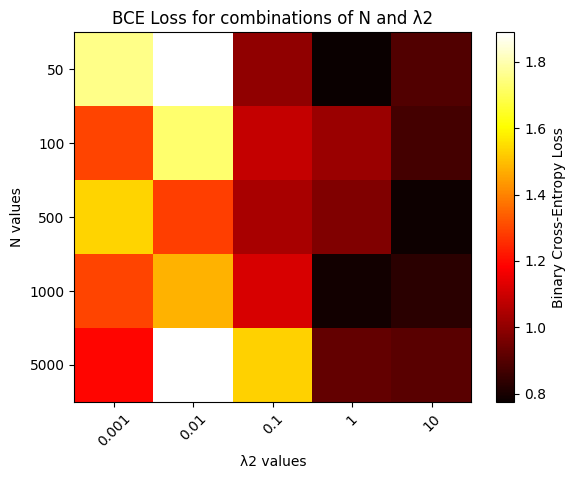

For this generated data, I observed that as we increase the regularization parameter, the trend in general followed was that BCE Loss decreased, but for $N$ the trend was not this uniform. But, we cannot straightaway choose the highest $\lambda_2$ because that would also lead to overfitting. Hence, we would choose a sweet spot in any general data after plotting such comparisons, which can fairly minimise BCE for a reasonable $N$ and $\lambda_2$.

### References:

A list of the references that I have used for the purpose of this assignment:

1. https://numpy.org/doc/2.0/reference/generated/numpy.linalg.pinv.html
2. https://stackoverflow.com/questions/2891790/pretty-print-a-numpy-array-without-scientific-notation-and-with-given-precision
3. https://courses.grainger.illinois.edu/cs357/sp2021/notes/ref-16-svd.html
4. https://stackoverflow.com/questions/74702379/numpys-pinv-seem-slow
5. https://www.sciencedirect.com/science/article/pii/S0167715213001752
6. https://community.deeplearning.ai/t/bias-variance-in-relation-to-degree-of-polynomial-lambda/450715
7. https://math.stackexchange.com/questions/1962877/compute-the-gradient-of-mean-square-error
8. Prompt : Compare the results obtained from a normal weight vs 1/lambda1 and the correlated result. Is there any difference, explain why, if any.
9. Clarification regarding sign of gradient value for MSE on discussion with Pranav Prakash, `22B3945`

For generic code sugggestions, I have used ChatGPT with the prompt - "Give me a basic Python code to implement linear regression from scratch with all intermediate stages"